# EDA Kahoot

### Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lectura de archivo

In [2]:
# Marcamos la ruta del archivo
archive = "./Practica_EDA_Kahoot.xlsx"
# Mediante el uso de la libreria de pandas, abrimos el excel
df = pd.read_excel(archive)

### Analisis de archivo

In [3]:
# Tras comprobaciones y para mejor trabajo, eliminamos las columnas innecesarias (axis = 1 para indicar columnas)
clean_df = df.drop(['Answer 5','Answer 6','Time Allotted to Answer (seconds)'], axis=1)

In [4]:
def percentage_of_correct_answers_and_errors_for_questions(df):
    # Filtro las respuestas correctas
    correct_questions = df[df['Correct / Incorrect'] == "Correct"]
    # Filtro las respuestas incorrectas
    incorrect_questions = df[df['Correct / Incorrect'] == "Incorrect"]
    #  Agrupo por preguntas, y saco los registros que hay de respuestas correctas
    number_of_correct_questions = correct_questions.groupby('Question Number').size()
    #  Agrupo por preguntas, y saco los registros que hay de respuestas incorrectas
    number_of_incorrect_questions = incorrect_questions.groupby('Question Number').size()
    # Saco el numero total de preguntas
    total_number_of_questions = df.groupby('Question Number').size()
    # Saco el porcentage de respuestas correctas por pregunta
    percentage_of_correct_questions = (number_of_correct_questions / total_number_of_questions) * 100
    # Saco el porcentage de respuestas incorrectas por pregunta
    percentage_of_incorrect_questions = (number_of_incorrect_questions / total_number_of_questions) * 100
    # Almaceno los resultados en un df
    percentage_per_questions = pd.DataFrame({
        'Successes': percentage_of_correct_questions,
        'Mistakes': percentage_of_incorrect_questions
    })
    # Realizo un reseteo en los títulos ( con 'drop=False' indicamos que ya hay indice, y 'inplace=True' que modificamos directamente el df)
    percentage_per_questions.reset_index(drop=False, inplace=True)
    # Sacamos un arreglo de la longitud que va a tener nuesto registro con arange, la libreria de numpy ([0,1,2,3,...,19,20])
    index = np.arange(len(percentage_per_questions))
    # Determinamos el tamaño del grafico
    plt.figure(figsize=(20, 6))
    # Asignamos valor a una de las barras,(posicion de la barra, datos de la barra, color, leyenda, anchura)  
    max_ = plt.bar(index+0.2, percentage_per_questions['Successes'], color='lightgreen', label='% de aciertos', width=0.35)
    min_ = plt.bar(index-0.2, percentage_per_questions['Mistakes'], color='tomato', label='% de errores', width=0.35)
    plt.xlabel('Preguntas')
    plt.ylabel('Porcentage')
    plt.title('Porcentaje de respuestas correctas y errores de las preguntas')
    plt.xticks(index, percentage_per_questions['Question Number'])
    plt.legend()
    plt.show()
    

In [5]:
def average_of_correct_answers(df):
    # Filtro las respuestas correctas por jugador
    correct_answers_per_person = df[df['Correct / Incorrect'] == 'Correct'].groupby('Player').size()
    # Filtro las respuestas incorrectas por jugador
    incorrect_answers_per_person = df[df['Correct / Incorrect'] == 'Incorrect'].groupby('Player').size()
    # Almaceno los resultados en un df
    df_answer = pd.DataFrame({
        'Correct': correct_answers_per_person,
        'Incorrect': incorrect_answers_per_person
    })
    # Realizo un reseteo en los títulos ( con 'drop=False' indicamos que ya hay indice, y 'inplace=True' que modificamos directamente el df)
    df_answer.reset_index(drop=False, inplace=True)
    # Creo un grafico de bigotes, el cual contendra uno con las respuestas correctas y otro con las respuestas incorrectas
    plt.boxplot([df_answer['Correct'], df_answer['Incorrect']])
    # Asigno nombres al eje x
    # https://es.stackoverflow.com/questions/500335/editar-xticks-de-un-histograma-en-python
    plt.xticks([1, 2], ['Correctas', 'Incorrectas'])
    plt.xlabel('Respuestas',)
    plt.ylabel('Resultados')
    plt.title('Media de Respuestas Correctas e Incorrectas por Players')
    plt.show()


In [6]:
def time_histogram(df):
    # Creo un df para almacenar los datos
    df_record = pd.DataFrame()
    # Calculo el tiempo medio por jugador
    df_record['grouping_by_players_mean'] = df.groupby('Player')['Answer Time (seconds)'].mean().astype(int)
    # Realizo un conteo de la frecuencia que parece cada tiempo
    df_freq = df_record['grouping_by_players_mean'].value_counts()
    # Creo un df para almacenar los datos 
    df_conteo = pd.DataFrame(df_freq.reset_index())
    # Reinicio el nombre de las columnas
    df_conteo.columns = ['seconds_of_response', 'response_frequency']
    # Realizo frecuencia relativa, (Numero de veces que se repite un numero en un conjunto de datos)
    df_conteo['relative_frequency'] = 100 * df_conteo['response_frequency']/df_conteo['response_frequency'].sum()
    # Realizo frecuencia acumulada, (Suma de la frecuencia absoluta)
    df_conteo['cumulative_frequency'] = df_conteo['response_frequency'].cumsum()
    
    plt.hist(df_record)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title('Tienpo medio global de respuesta')
    plt.xticks(df_conteo['seconds_of_response'])
    plt.yticks(df_conteo['response_frequency'])
    plt.show()

In [7]:
def answers_per_player(df):
    # Filtro las respuestas correctas por jugador
    correct_answers_per_person = df[df['Correct / Incorrect'] == 'Correct'].groupby('Player').size()
    # Filtro las respuestas incorrectas por jugador
    incorrect_answers_per_person = df[df['Correct / Incorrect'] == 'Incorrect'].groupby('Player').size()
    # Almaceno los resultados en un df
    df_answer = pd.DataFrame({
        'Correct': correct_answers_per_person,
        'Incorrect': incorrect_answers_per_person
    })
    # Realizo un reseteo en los títulos ( con 'drop=False' indicamos que ya hay indice, y 'inplace=True' que modificamos directamente el df)
    df_answer.reset_index(drop=False, inplace=True)   
    plt.figure(figsize=(10, 6))
    # Utilizamos plt.barh() para graficar barras horizontales
    plt.barh(df_answer['Player'], df_answer['Correct'], label='Correct')
    # https://www.geeksforgeeks.org/matplotlib-pyplot-barh-function-in-python/
    plt.barh(df_answer['Player'], df_answer['Incorrect'], left=df_answer['Correct'],  label='Incorrect')
    plt.xlabel('Respuestas')
    plt.ylabel('Jugadores')
    plt.title('Respuestas Correctas e Incorrectas por Jugador')
    # https://docs.kanaries.net/es/topics/Matplotlib/matplotlib-legend-outside-of-plot
    plt.legend(title='Correct / Incorrect', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


c:\Users\sergi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


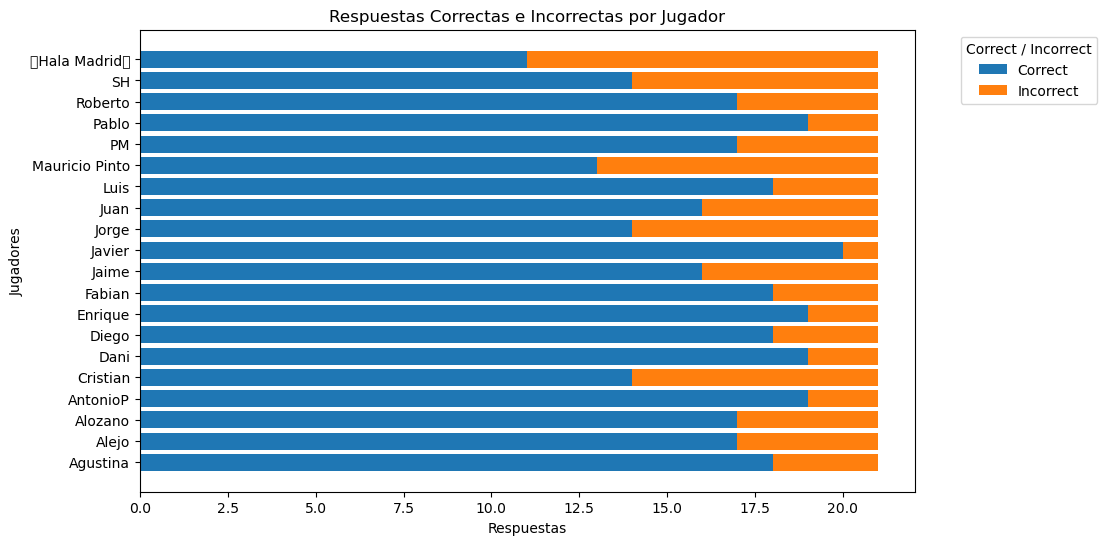

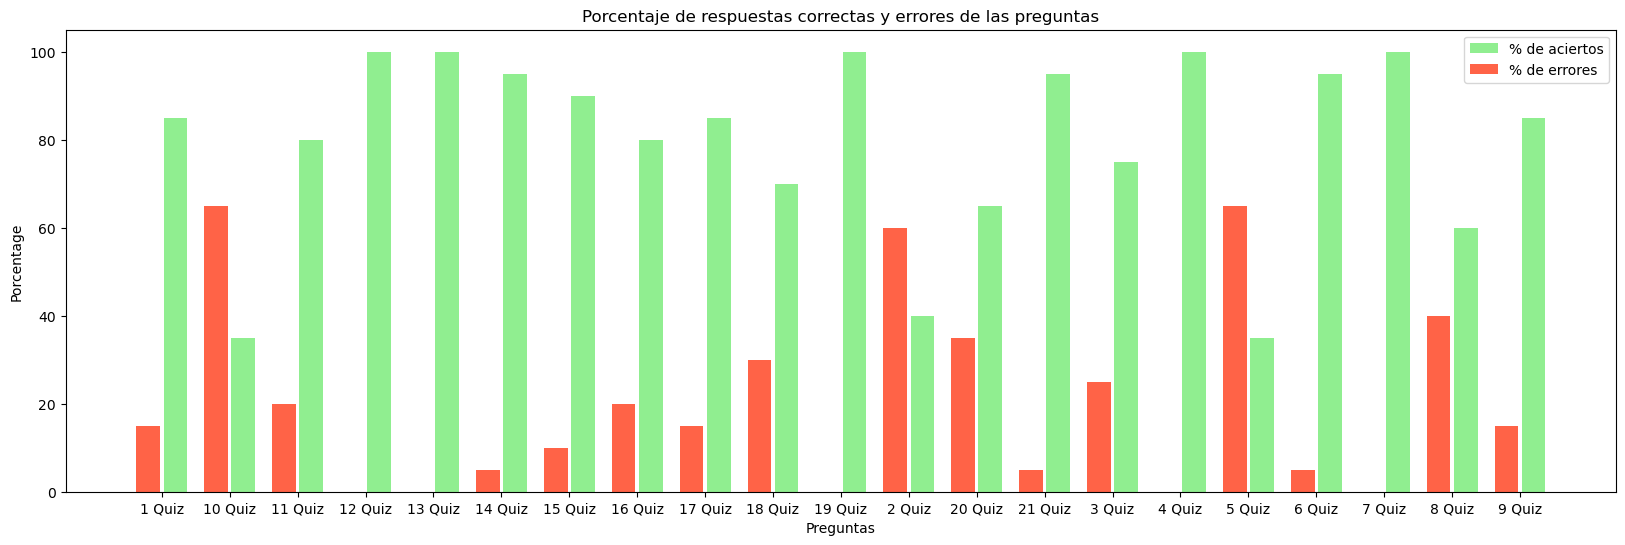

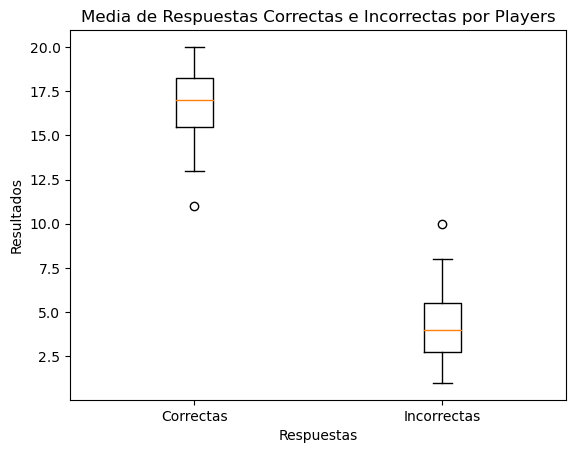

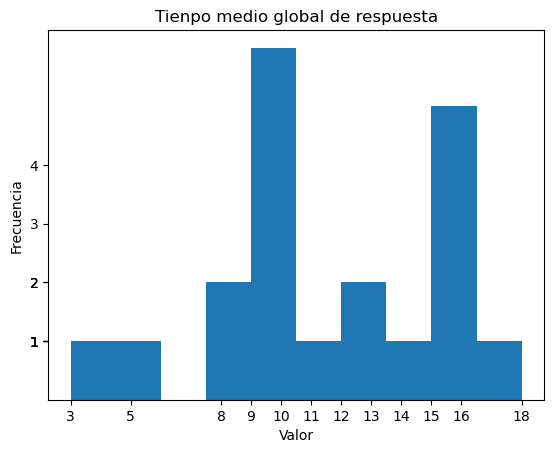

In [8]:
if __name__ == '__main__':
    answers_per_player(clean_df)
    percentage_of_correct_answers_and_errors_for_questions(clean_df)
    average_of_correct_answers(clean_df)
    time_histogram(clean_df)